# 1. Знакомимся с данными

Присмотримся к содержимому таблицы sql.pokemon: в ней хранится информация о покемонах.

|Название поля|Содержимое|
|-|-|
|id|уникальный идентификатор|
|name|имя|
|type1|основной тип|
|type2|дополнительный тип|
|hp|количество очков здоровья|
|attack|показатели атаки|
|defense|показатели защиты|
|speed|показатели скорости|

Выведите все поля из таблицы sql.pokemon и изучите её содержимое.

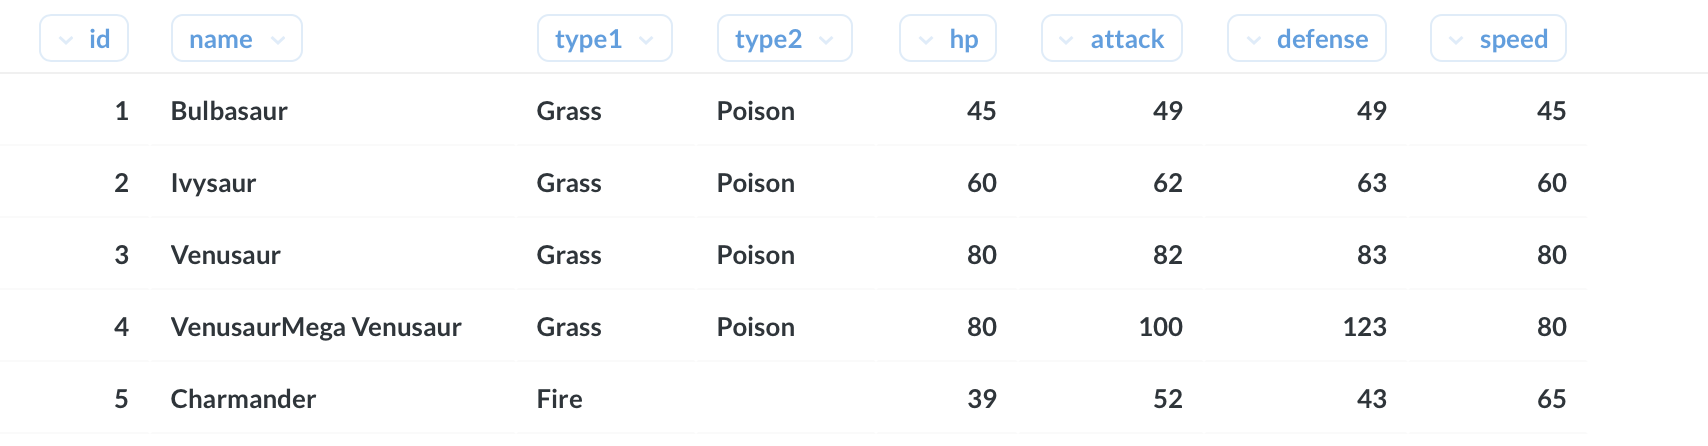

**Примечание**. На этом скриншоте представлен лишь фрагмент таблицы: в действительности она значительно больше и содержит почти 800 строк.

# 2. Убираем повторяющиеся значения

**Примечание**. Как и в предыдущем модуле, вы можете посмотреть подробный разбор структуры предлагаемых запросов во вкладке **Детализация**.

Для начала получим все основные типы покемонов.

<code>

SELECT

    type1

FROM sql.pokemon
</code>

Видно, что типы повторяются, потому что в результате запроса вы получаете все строки, которые подходят под заданные условия.

Чтобы получить **уникальные** значения из столбца, воспользуемся ключевым словом DISTINCT.

<code>

SELECT DISTINCT

    type1

FROM sql.pokemon
</code>

Мы можем применять DISTINCT и для нескольких столбцов.


Получим, например, все уникальные пары основного и дополнительного типов для покемонов.

<code>

SELECT DISTINCT

    type1,

    type2

FROM sql.pokemon
</code>

На скриншоте ниже представлен фрагмент вывода по нашему запросу.

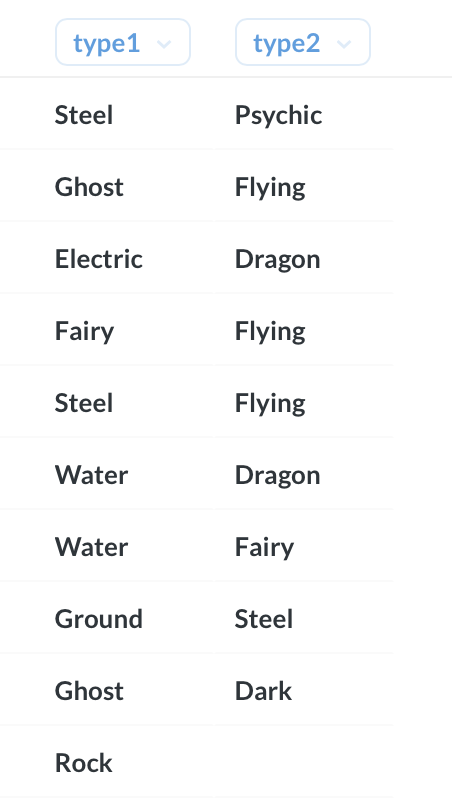

**Обратите внимание!** DISTINCT пишется только один раз, в начале списка получаемых столбцов.

# 3. Агрегатные функции

✍ Кроме простых математических операций, которые мы использовали в предыдущем модуле, СУБД позволяет проводить статистические вычисления для нескольких строк.


Давайте посчитаем количество строк в таблице. Для этого применим агрегатную функцию COUNT.

<code>

SELECT

    COUNT(*)

FROM sql.pokemon
</code>

COUNT считает строки, а звёздочка (*) в аргументе функции означает, что считаются все строки, которые возвращает запрос.

Если в аргументе функции указать название столбца, функция обработает **только строки с непустым значением**.

Внутри функции COUNT мы можем также применять DISTINCT, чтобы вычислить количество уникальных значений.

<code>

SELECT

    COUNT(DISTINCT type1)

FROM sql.pokemon
</code>

Назовём основные агрегатные функции, с которыми нам предстоит работать:

* COUNT — вычисляет число непустых строк;
* SUM — вычисляет сумму;
* AVG — вычисляет среднее;
* MAX — вычисляет максимум;
* MIN — вычисляет минимум.

Присмотримся к ним внимательнее.

Разумеется, вы можете использовать в запросе фильтрацию строк с помощью WHERE, чтобы получить агрегированное значение только для отдельных строк.

Кроме того, мы можем применять несколько агрегатных функций в одном запросе.

<code>

SELECT

    COUNT(*) AS "всего травяных покемонов",

    COUNT(type2) AS "покемонов с дополнительным типом",

    AVG(attack) AS "средняя атака",

    AVG(defense) AS "средняя защита"

FROM sql.pokemon

WHERE type1 = 'Grass'
</code>

В результате получим следующий вывод:

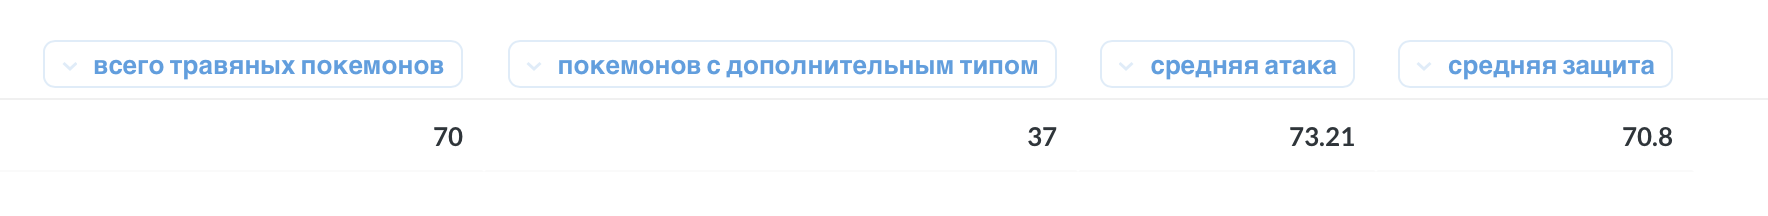

Итак, мы разобрали и попробовали применить базовые агрегатные функции.

**ДОПОЛНИТЕЛЬНО**

С полным перечнем существующих агрегатных функций вы можете ознакомиться в [официальной документации](https://postgrespro.ru/docs/postgrespro/11/functions-aggregate).

# 4. Группировка

✍ Как мы помним, агрегатные функции вычисляют какой-то параметр для набора строк.

Прежде мы применяли агрегатные функции для всего вывода, а сейчас используем для различных групп строк. Поможет нам в этом ключевое слово GROUP BY.

GROUP BY используется для определения групп выходных строк, к которым могут применяться агрегатные функции.

Выведем число покемонов каждого типа.

<code>

SELECT

    type1 AS pokemon_type,

    COUNT(*) AS pokemon_count

FROM sql.pokemon

GROUP BY type1

ORDER BY type1
</code>

Мы получили такой результат:

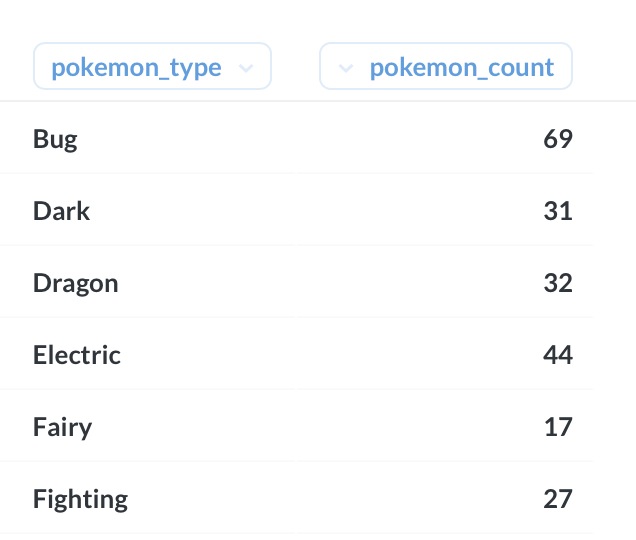

Вывод, конечно же, можно сортировать по столбцу с агрегированием.


Представим ТОП существующих типов покемонов.

<code>

SELECT

    type1 AS pokemon_type,

    COUNT(*) AS pokemon_count

FROM sql.pokemon

GROUP BY pokemon_type

ORDER BY COUNT(*) DESC
</code>

**Обратите внимание!** Мы использовали в группировке не название столбца, а его алиас.

Мы можем осуществлять группировку по нескольким столбцам.

<code>

SELECT

    type1 AS primary_type,

    type2 AS additional_type,

    COUNT(*) AS pokemon_count

FROM sql.pokemon

GROUP BY 1, 2

ORDER BY 1, 2 NULLS FIRST
</code>

**Обратите внимание!** В группировке можно указывать порядковый номер столбца так же, как мы делали это в прошлом модуле для сортировки.

GROUP BY можно использовать и без агрегатных функций. Тогда его действие будет равносильно действию DISTINCT.

Сравните выводы двух запросов:

<code>

SELECT DISTINCT 

    type1

FROM sql.pokemon
</code>

---------------------

<code>

SELECT

    type1

FROM sql.pokemon

GROUP BY type1
</code>

# 5. Фильтрация агрегированных строк

✍ Если ключевое слово WHERE определяет фильтрацию строк до агрегирования, то для фильтрации уже агрегированных данных применяется ключевое слово HAVING.

**Важно!** HAVING обязательно пишется после GROUP BY.

Выведем типы покемонов и их средний показатель атаки, при этом оставим только тех, у кого средняя атака больше 90.

<code>

SELECT

    type1 AS primary_type,

    AVG(attack) AS avg_attack

FROM sql.pokemon

GROUP BY primary_type 

HAVING AVG(attack) > 90
</code>

Попробуйте удалить из запроса вывод второго столбца (со средним показателем атаки).

?
Что получилось?

Запрос работает и выводит только названия типов, у которых средний показатель атаки выше 90.

В HAVING вы можете использовать все те же условия, что и в WHERE.

ДОПОЛНИТЕЛЬНО

Об отличиях HAVING от WHERE можно прочитать в [официальной документации](https://postgrespro.ru/docs/postgresql/11/tutorial-agg).

### ВМЕСТО РЕЗЮМЕ

В общем виде синтаксис оператора SELECT, с учётом имеющихся на данный момент знаний, представляем следующим образом:

<code>

SELECT [ALL | DISTINCT] список_столбцов|*

FROM список_имён_таблиц

[WHERE условие_поиска]

[GROUP BY список_имён_столбцов]

[HAVING условие_поиска]

[ORDER BY имя_столбца [ASC | DESC],…]
</code>

**Обратите внимание!** В квадратных скобках указаны необязательные предложения: они могут отсутствовать в операторе SELECT.

# 6. Итоги

✍ Итак, каковы наши успехи в этом модуле?

Вы познакомились с агрегатными функциями и научились:

* считать количество строк, сумму, минимум, максимум, среднее по значениям таблицы;
* выводить агрегированные значения в разных разрезах;
* фильтровать по агрегированным значениям.

И в довершение итогов напомним структуру запроса, который мы можем составить с учётом новых знаний:

<code>

SELECT

    столбец1 AS новое_название,

    столбец2,

    АГРЕГАТ(столбец3)

FROM таблица

WHERE (условие1 OR условие2)

    AND условие3

GROUP BY столбец1, столбец2

HAVING АГРЕГАТ(столбец3) > 5

ORDER BY сортировка1, сортировка2

OFFSET 1 LIMIT 2
</code>